In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 653.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0


In [2]:
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/data_downloaders/download_calcagno.sh"
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/preprocessors/preprocess_calcagno.py"
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/utils/mean_margin.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1445  100  1445    0     0   2641      0 --:--:-- --:--:-- --:--:--  2641
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5416  100  5416    0     0  10033      0 --:--:-- --:--:-- --:--:-- 10048
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   987  100   987    0     0   1262      0 --:--:-- --:--:-- --:--:--  1262


In [3]:
!chmod +x download_calcagno.sh

In [4]:
!./download_calcagno.sh data

==> Downloading Zenodo ZIP...
--2025-07-24 08:34:51--  https://zenodo.org/records/7055957/files/Nikatag/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7972177 (7.6M) [application/octet-stream]
Saving to: ‘/content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip’

/content/data/Singl 100%[===================>]   7.60M   452KB/s    in 19s     

2025-07-24 08:35:11 (419 KB/s) - ‘/content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip’ saved [7972177/7972177]

==> Unzipping Zenodo ZIP...
Archive:  /content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip
8f7e1d14be5fa874c92bff1d8cb282eb9aa613fd
   creating: /content/data/Nikatag-Single-Cel

In [5]:
DATA_DIR = 'data'

In [6]:
PROBLEM_KEY = 'ref_0_que_1-7'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import scanpy as sc
import pandas as pd

In [9]:
from preprocess_calcagno import get_preprocessed_anndata

ad = get_preprocessed_anndata(PROBLEM_KEY, DATA_DIR)

In [10]:
sc.tl.pca(ad)

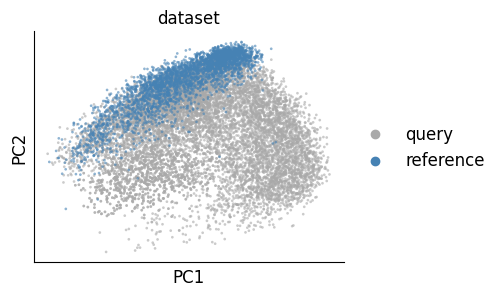

In [11]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'datagroup' categories
custom_palette = [ "#A9A9A9", "#4682B4",]  # SteelBlue and DarkGray

# Map the colors to 'datagroup' categories
ad.uns['dataset_colors'] = custom_palette

# Reorder 'ad' by 'datagroup' first by 'reference', then by 'query'
ad = ad[ad.obs['dataset'].argsort(kind='mergesort')]  # Reorder AnnData object

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Generate PCA plot with custom palette
sc.pl.pca(ad, color='dataset', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('reference_query_pca.svg')
plt.show()
plt.close()

In [12]:
OUTPUT_DIR = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/slim"

In [13]:
scpss_df = pd.read_csv(f"{OUTPUT_DIR}/case-scpss.csv", index_col=0)
scpss_df

,scpss_scores
AAACGAAAGAGTTCGG,0.946158
AAACGAAAGGCTTCCG,0.922552
AAACGAACACCGAATT,1.042816
AAACGCTGTGAGATCG,0.470273
AAAGAACAGGGAGGCA,1.031610
...,...
TTTCAGTGTCATAGTC,0.537842
TTTGGTTAGTCCTGCG,0.644314
TTTGTTGAGAGGTTTA,0.745755
TTTGTTGCACAGAGCA,0.485185


In [14]:
multimil_df = pd.read_csv(f"{OUTPUT_DIR}/case-multimil.csv", index_col=0)
multimil_df

,cell_attn
AACCTGAAGACCTCCG,0.007886
AAACGCTGTGAGATCG,0.007483
AAACGAACACCGAATT,0.007838
AAACGAAAGGCTTCCG,0.007845
AAACGAAAGAGTTCGG,0.007901
...,...
CATTGAGCATGTGGTT,0.007835
CATTCTATCGCACGAC,0.007802
CATTCTATCACACCGG,0.007808
CATTCATCAACTAGAA,0.007835


In [15]:
cvi_df = pd.read_csv(f"{OUTPUT_DIR}/case-contrastivevi.csv", index_col=0)
cvi_df

,variant_1_scores,variant_2_scores
AAACCCACAAAGTGTA,-1.298415,6.326511
AAACCCAGTCCGGTCA,-0.419626,5.466395
AAACCCATCATTACTC,-1.751435,5.008354
AAACGAACAATGTCAC,-0.950287,5.694077
AAACGAACAGCAAGAC,-1.426107,6.822270
...,...,...
TTTCGATAGCGTTCCG,-0.942762,8.083864
TTTCGATAGTGAGTGC,-1.447938,8.323454
TTTGACTGTCTAACTG,-1.256110,5.117413
TTTGATCTCCGTAGTA,-0.371540,7.618991


In [16]:
hidden_df = pd.read_csv(f"{OUTPUT_DIR}/case-hidden-0.csv", index_col=0)
hidden_df

,hidden_score
AAACCCACAAAGTGTA,8.150284e-07
AAACCCAGTCCGGTCA,4.655580e-05
AAACCCATCATTACTC,1.613186e-02
AAACGAACAATGTCAC,1.561687e-03
AAACGAACAGCAAGAC,3.521072e-02
...,...
TTTCGATAGCGTTCCG,9.999981e-01
TTTCGATAGTGAGTGC,9.930232e-01
TTTGACTGTCTAACTG,9.999986e-01
TTTGATCTCCGTAGTA,9.999921e-01


In [17]:
ad.obs = ad.obs.join(multimil_df, how='left')

In [18]:
ad.obs = ad.obs.join(cvi_df, how='left')

In [19]:
ad.obs = ad.obs.join(hidden_df, how='left')

In [20]:
ad.obs = ad.obs.join(scpss_df, how='left')

In [21]:
cluster_to_zone = {
    "Ankrd1": "BZ1",
    "Xirp2": "BZ2",
    "Myh6": "RZ",
}

ad.obs["zone"] = ad.obs["final_cluster"].map(cluster_to_zone)

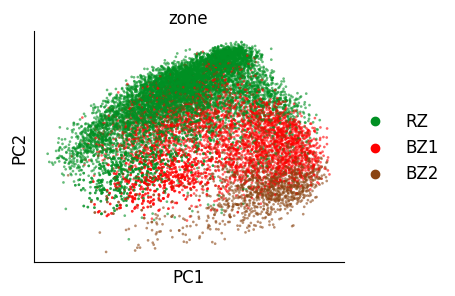

In [22]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#009023", "#FF0000", "#8B4513"]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
ad.uns['zone_colors'] = custom_palette

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

zone_order = ["RZ", "BZ1", "BZ2"]

ad.obs['zone'] = pd.Categorical(
    ad.obs['zone'],
    categories=zone_order,
    ordered=True
)

# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='zone', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('zone_pca.svg')
plt.show()
plt.close()

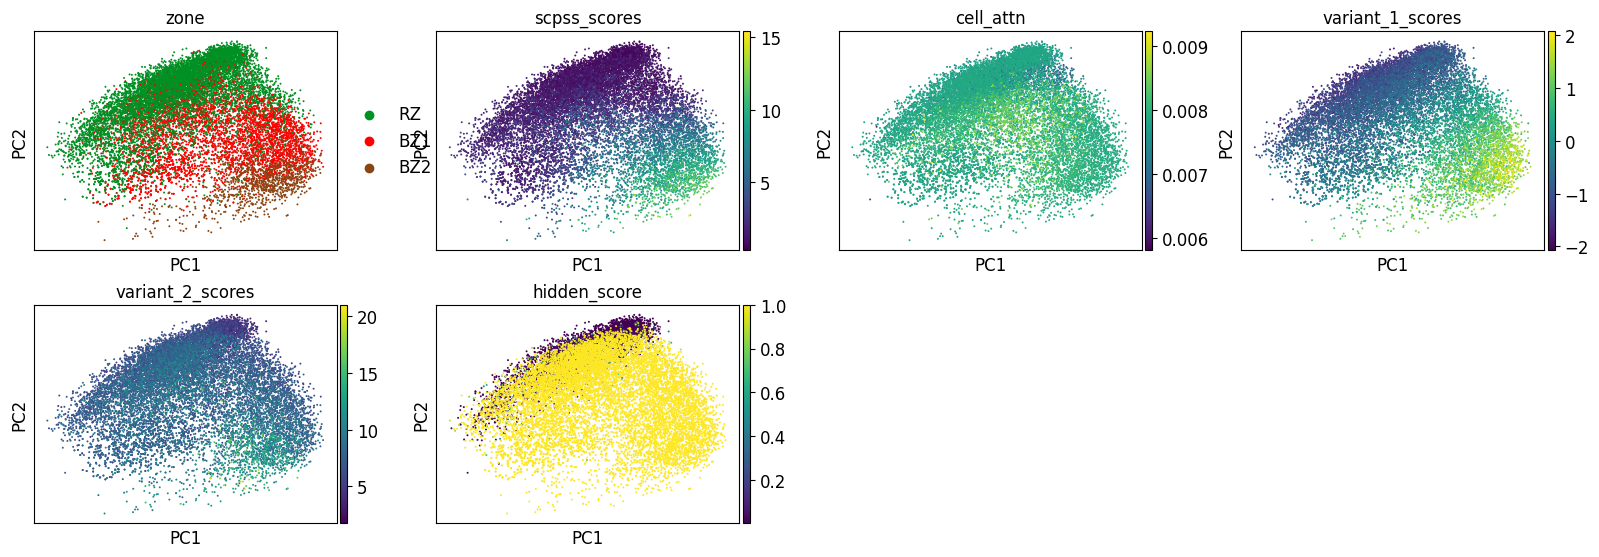

In [23]:
sc.pl.pca(ad, color=['zone', 'scpss_scores', 'cell_attn', 'variant_1_scores', 'variant_2_scores', 'hidden_score'])

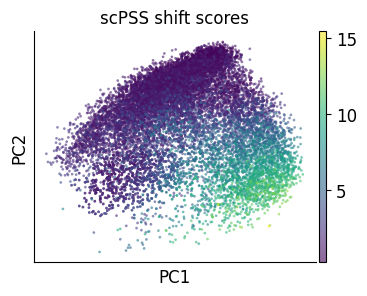

In [24]:

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='scpss_scores', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('scPSS shift scores')

plt.savefig('scpss_pca.svg')
plt.show()
plt.close()

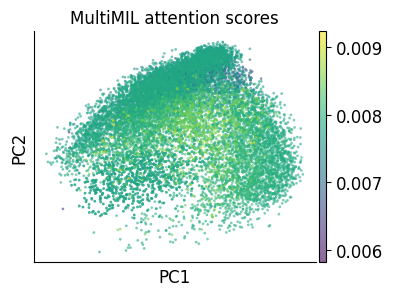

In [25]:

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='cell_attn', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('MultiMIL attention scores')

plt.savefig('multimil_pca.svg')
plt.show()
plt.close()

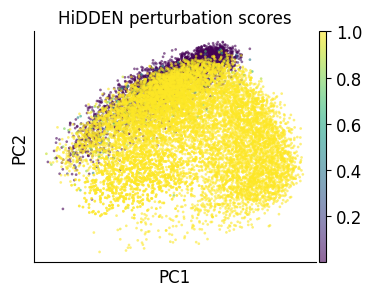

In [26]:

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='hidden_score', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('HiDDEN perturbation scores')

plt.savefig('hidden_pca.svg')
plt.show()

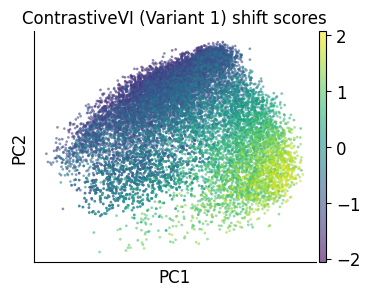

In [27]:

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='variant_1_scores', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('ContrastiveVI (Variant 1) shift scores')

plt.savefig('cvi_var_1_pca.svg')
plt.show()

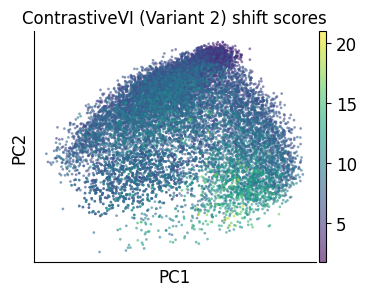

In [28]:

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='variant_2_scores', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('ContrastiveVI (Variant 2) shift scores')

plt.savefig('cvi_var_2_pca.svg')
plt.show()

In [29]:
ad_que = ad[ad.obs['dataset'] == 'query']
ad_que

View of AnnData object with n_obs × n_vars = 11475 × 1426
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'batch_key', 'zone', 'cell_attn', 'variant_1_scores', 'variant_2_scores', 'hidden_score', 'scpss_scores'
    uns: 'pca', 'dataset_colors', 'zone_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [30]:
true_labels = ad_que.obs['zone'].isin(['BZ1', 'BZ2']).to_numpy()

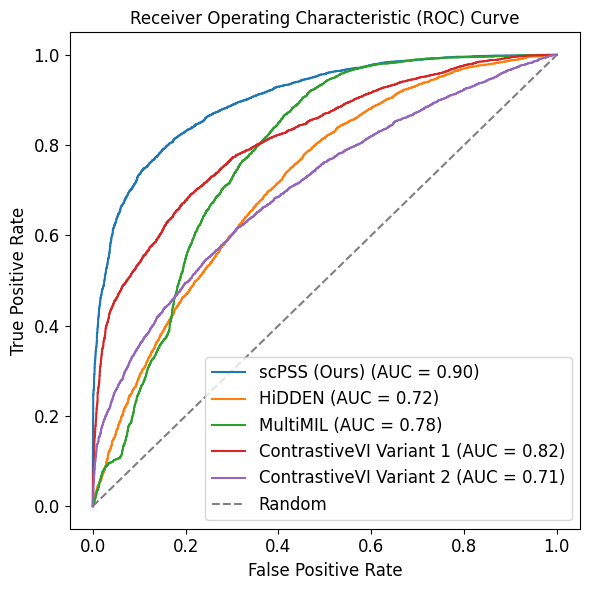

AUC Improvement (%):
Ours vs HiDDEN: 25.52%
Ours vs MultiMIL: 16.12%
Ours vs ContrastiveVI Variant 1: 10.51%
Ours vs ContrastiveVI Variant 2: 27.95%


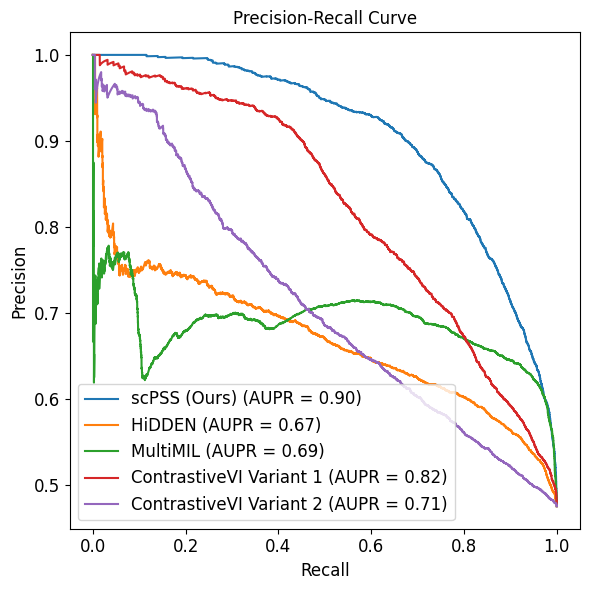

AUPR Improvement (%):
Ours vs HiDDEN: 35.00%
Ours vs MultiMIL: 31.80%
Ours vs ContrastiveVI Variant 1: 9.97%
Ours vs ContrastiveVI Variant 2: 27.52%


In [31]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

score_columns = {
    'scpss_scores': 'scPSS (Ours)',
    'hidden_score': 'HiDDEN',
    'cell_attn': 'MultiMIL',
    'variant_1_scores': 'ContrastiveVI Variant 1',
    'variant_2_scores': 'ContrastiveVI Variant 2'
}

y_true = true_labels
ours_key = 'scpss_scores'

# --- AUC Calculation and Plotting ---
aucs = {}
plt.figure(figsize=(6, 6))
for key, label in score_columns.items():
    y_scores = ad_que.obs[key].to_numpy()
    auc = roc_auc_score(y_true, y_scores)
    aucs[key] = auc
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.tight_layout()
plt.savefig('auroc.svg')
plt.show()

# Print % improvement in AUC
print("AUC Improvement (%):")
auc_ours = aucs[ours_key]
for key, auc in aucs.items():
    if key != ours_key:
        improvement = 100 * (auc_ours - auc) / auc
        print(f"Ours vs {score_columns[key]}: {improvement:.2f}%")

# --- AUPR Calculation and Plotting ---
auprs = {}
plt.figure(figsize=(6, 6))
for key, label in score_columns.items():
    y_scores = ad_que.obs[key].to_numpy()
    aupr = average_precision_score(y_true, y_scores)
    auprs[key] = aupr
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label=f'{label} (AUPR = {aupr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('aupr.svg')
plt.show()

# Print % improvement in AUPR
print("AUPR Improvement (%):")
aupr_ours = auprs[ours_key]
for key, aupr in auprs.items():
    if key != ours_key:
        improvement = 100 * (aupr_ours - aupr) / aupr
        print(f"Ours vs {score_columns[key]}: {improvement:.2f}%")
